# Proyecto 6 - Luis G

# Importar librerías

In [129]:
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
import math

# Carga de datos

In [130]:
df_games = pd.read_csv('games.csv')

# Diagnóstico inicial

In [131]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [132]:
df_games.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14185,Need for Speed (2015),PC,2016.0,Racing,0.00,0.03,0.00,0.00,NaN,NaN,NaN
2164,PlayStation All-Stars Battle Royale,PS3,2012.0,Action,0.50,0.27,0.04,0.15,74.0,7.3,T
10162,Family Game Night 4: The Game Show,PS3,2011.0,Misc,0.08,0.02,0.00,0.01,NaN,tbd,E
5516,NCAA GameBreaker 2001,PS,2000.0,Sports,0.18,0.12,0.00,0.02,69.0,tbd,E
2715,Super Monkey Ball: Touch & Roll,DS,2005.0,Misc,0.69,0.00,0.00,0.06,NaN,NaN,NaN
6697,Avatar: The Last Airbender - The Burning Earth,Wii,2007.0,Action,0.23,0.00,0.00,0.02,NaN,NaN,NaN
10279,Pimp My Ride,X360,2006.0,Racing,0.10,0.00,0.00,0.01,38.0,3.8,T
5748,Brothers In Arms: Earned in Blood,XB,2005.0,Shooter,0.23,0.07,0.00,0.01,85.0,8.6,M
279,Teenage Mutant Ninja Turtles,NES,1989.0,Action,3.38,0.44,0.31,0.04,NaN,NaN,NaN
1858,F-Zero X,N64,1998.0,Racing,0.45,0.33,0.29,0.03,NaN,NaN,NaN


## Hallazgos de los datos

- Los nombres de las columnas deberían estar en letras minúsculas
- Los nombres de los juegos podríamos estandarizarlos
- Encontramos valores ausentes en name, hay que revisar por qué son
- La columna de year of release debería estar en número entero
- Encontramos valores ausentes en year of release, debemos revisar a fondo
- Encontramos valores ausentes en columna genre, reemplazaremos
- Encontramos valores ausentes en critic score y user score, probablemente a estas no les modifique nada, al ser puntuaciones de los juegos
- Cambiar el datatype de la columna user score
- Igualar los scores para que estén valorados sobre 100
- Encontramos valores ausentes en rating, que es de esperar, ya que no todos los juegos tienen la clasificación ESRB.
- Probablemente sea buena práctica cambiar las siglas de la columna rating a lo que significan, para presentación de los datos posterior.
- Crearemos una columna nueva donde se almacene los datos de las ventas totales.
- Crearemos una columna nueva donde agruparemos las consolas según su compañía creadora
- Buscaremos duplicados explicitos e implicitos

## Procesamiento de los datos

In [133]:
# Cambiar los nombres de las columnas a minúsculas

df_games.columns = [column.lower() for column in df_games.columns]

In [134]:
# Cambiar la columna name para estandarizar los nombres

df_games['name'] = df_games['name'].str.upper().str.strip().str.replace('.', '').str.replace(',','').str.replace(';','').str.replace(':','')

In [135]:
# Valores ausentes en name

df_games.query('name != name') # Encontramos juegos de 1993, donde no tenemos el título; entonces procederemos a cambiar el nombre de estos registros

df_games['name'] = df_games['name'].fillna('UNKNOWN')


In [136]:
# Valores ausentes en year of release

df_games['year_of_release'].isna().sum() # Encontramos 269 valores nulos, los omitiré por ahora para el análisis, ya que son pocos registros

df_games = df_games.dropna(subset='year_of_release').reset_index(drop=True)

In [137]:
# Cambiar el datatype de la columna year of release

df_games['year_of_release'] = df_games['year_of_release'].astype(int)

In [138]:
# Valores ausentes en genre

df_games['genre'].isna().sum() # Encontramos 2 valores, reemplazaremos con unknown

df_games['genre'] = df_games['genre'].fillna('Unknown')

In [139]:
# Cambiar el datatype de la columna user_score

df_games['user_score'].unique() # Encontramos las letras tbd, que hacen que la columna sea object

df_games['user_score'] = df_games['user_score'].replace('tbd', np.nan) # Quitamos las letras tbd y los dejamos como valores nulos

df_games['user_score'] = df_games['user_score'].astype(float) # Convertimos a tipo float


df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16446 entries, 0 to 16445
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16446 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16446 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [140]:
# Igualar las magnitudes de las columnas de critic score y user score

df_games['user_score'] = df_games['user_score'] * 10 # User score es la que está valorada sobre 10, multiplicamos para que sea sobre 100


In [141]:
# Cambiar los rating a que sean el nombre que realmente representan

rating_dicc = {
    'E': 'Everyone',
    'T': 'Teens',
    'M': 'Mature',
    'E10+': 'Everyone +10 y/o',
    'K-A': 'Kids and Adults',
    'EC': 'Early Childhood',
    'RP': 'Rating Pending',
    'AO': 'Adults Only'
}

df_games['rating'] = df_games['rating'].map(rating_dicc)

df_games['rating'].unique()

array(['Everyone', nan, 'Mature', 'Teens', 'Everyone +10 y/o',
       'Kids and Adults', 'Adults Only', 'Early Childhood',
       'Rating Pending'], dtype=object)

In [142]:
# Columna con ventas totales

df_games['total_sales'] = df_games['jp_sales'] + df_games['eu_sales'] + df_games['na_sales'] + df_games['other_sales']

df_games.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
6998,SHIN NIPPON PRO WRESTLING TOUKON RETSUDEN 3,PS,1998,Fighting,0.00,0.00,0.21,0.01,NaN,NaN,NaN,0.22
9538,KARAOKE REVOLUTION,X360,2009,Misc,0.12,0.00,0.00,0.01,62.0,NaN,Teens,0.13
13982,TRAP GUNNER COUNTDOWN TO OBLIVION,PS,1998,Strategy,0.02,0.01,0.00,0.00,NaN,NaN,NaN,0.03
15478,URU AGES BEYOND MYST,PC,2003,Adventure,0.00,0.02,0.00,0.00,79.0,76.0,Everyone,0.02
1597,FROGGER THE GREAT QUEST,PS2,2001,Platform,0.60,0.47,0.00,0.16,32.0,46.0,Everyone,1.23
9804,NHL POWERPLAY '96,PS,1996,Sports,0.06,0.04,0.00,0.01,NaN,NaN,NaN,0.11
11634,SOCCER TSUKU PRO SOCCER CLUB O TSUKUROU!,PSV,2013,Sports,0.00,0.00,0.07,0.00,NaN,NaN,NaN,0.07
11987,SHIN CHAN LAS NUEVAS AVENTURAS PARA WII!,Wii,2006,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN,0.07
10177,MEGA MAN BATTLE NETWORK 5 DOUBLE TEAM DS (JP S...,DS,2005,Role-Playing,0.00,0.00,0.11,0.00,NaN,NaN,NaN,0.11
13117,NODDY IN TOYLAND,DS,2011,Misc,0.00,0.04,0.00,0.00,NaN,NaN,NaN,0.04


<div class="alert alert-block alert-info">
<b></b> <a class="tocSkip"></a>
    Evaluación y trato de los valores nulos en las columnas de score
</div> 

<Axes: >

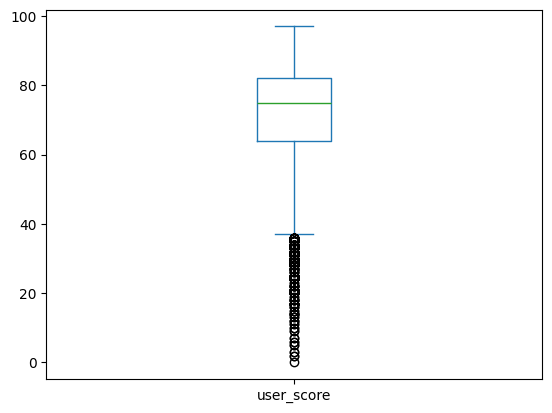

In [143]:
# Realizamos boxplots de la columna 'user_score' y 'critic_score' para revisar si hay valores atípicos

df_games['user_score'].plot(kind='box')

<Axes: >

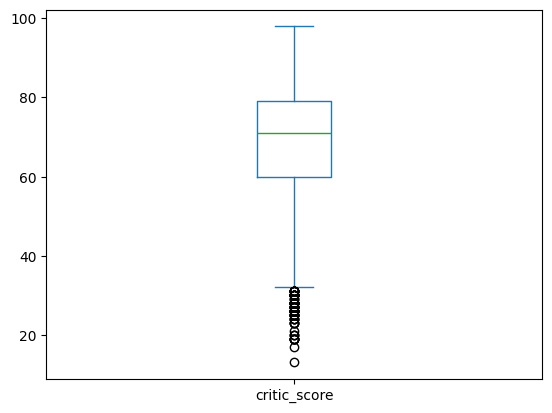

In [144]:
df_games['critic_score'].plot(kind='box')

In [145]:
# Por los valores atípicos, ocuparemos la mediana para rellenar los valores ausentes en las columnas de puntuaciones

user_score_median = df_games['user_score'].median()
critic_score_median = df_games['critic_score'].median()

df_games['user_score'] = df_games['user_score'].fillna(user_score_median)
df_games['critic_score'] = df_games['critic_score'].fillna(critic_score_median)

In [146]:
# Columna con las compañías de cada consola (Agrupando)

df_games['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [147]:
company_dicc = {'Nintendo' : ['Wii','NES','GB','DS','SNES','GBA','3DS','N64','WiiU','GC'], 'PlayStation' : ['PS3','PS2','PS4','PS','PSP','PSV'], 'Xbox' : ['X360','XB','XOne']} # Diccionario con la información de cada empresa

def consoleGroup(data): # Funcion para asignar según el diccionario
    for company, platforms in company_dicc.items():
        if data in platforms:
            return company
    return 'Other'

df_games['company'] = df_games['platform'].apply(consoleGroup) # Aplicar la función

df_games['company'].unique() # Verificación de lo hecho

array(['Nintendo', 'Xbox', 'PlayStation', 'Other'], dtype=object)

In [148]:
df_games.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,company
1649,SHREK / SHREK 2 2-IN-1 GAMEBOY ADVANCE VIDEO,GBA,2007,Misc,0.87,0.32,0.00,0.02,71.0,75.0,NaN,1.21,Nintendo
2666,MARVEL VS CAPCOM 2 NEW AGE OF HEROES,PS2,2002,Fighting,0.31,0.24,0.13,0.08,71.0,75.0,NaN,0.76,PlayStation
3967,TONY HAWK'S PROJECT 8,X360,2006,Sports,0.44,0.02,0.00,0.04,81.0,76.0,Teens,0.50,Xbox
12344,DIGIMON ALL-STAR RUMBLE,X360,2014,Fighting,0.05,0.01,0.00,0.01,71.0,57.0,Everyone +10 y/o,0.07,Xbox
11238,MEITANTEI CONAN & KINDAICHI SHOUNEN NO JIKENBO...,DS,2009,Adventure,0.00,0.00,0.08,0.00,71.0,75.0,NaN,0.08,Nintendo
11740,THE CROODS PREHISTORIC PARTY!,Wii,2013,Misc,0.01,0.05,0.00,0.00,71.0,75.0,NaN,0.06,Nintendo
13077,TOKIMEKI MEMORIAL GIRLS SIDE 1ST LOVE,DS,2007,Adventure,0.00,0.00,0.05,0.00,71.0,75.0,NaN,0.05,Nintendo
5439,POWER RANGERS NINJA STORM,GBA,2003,Misc,0.24,0.09,0.00,0.01,55.0,78.0,Everyone,0.34,Nintendo
750,FINAL FANTASY XIII,X360,2010,Role-Playing,1.28,0.67,0.01,0.21,82.0,63.0,Teens,2.17,Xbox
15376,ROZEN MAIDEN DUELLWALZER,PS2,2006,Adventure,0.00,0.00,0.02,0.00,71.0,75.0,NaN,0.02,PlayStation


In [149]:
# Buscar duplicados explicitos

df_games.duplicated().sum() # Nos devuelve 0

np.int64(0)

In [150]:
# Buscar duplicados implícitos, lo cual nos diría que quizá existen juegos con el mismo título, pero debemos verificar tanto su consola como su año de lanzamiento

df_games_dupl = df_games[df_games.duplicated(subset=['name', 'platform','year_of_release'],keep=False)]

df_games_dupl # Encontramos 2 casos donde es igual tanto el nombre, como la plataforma y el año de lanzamiento, quitaremos los duplicados

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,company
600,MADDEN NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.0,55.0,Everyone,2.56,PlayStation
652,UNKNOWN,GEN,1993,Unknown,1.78,0.53,0.00,0.08,71.0,75.0,NaN,2.39,Other
14022,UNKNOWN,GEN,1993,Unknown,0.00,0.00,0.03,0.00,71.0,75.0,NaN,0.03,Other
15971,MADDEN NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.0,55.0,Everyone,0.01,PlayStation


In [151]:
df_games = df_games.drop_duplicates(subset=['name', 'platform','year_of_release']).reset_index(drop=True)

In [152]:
df_games.duplicated(subset=['name','platform','year_of_release']).sum() # Verificamos que funcionó el proceso, tenemos 0 casos

np.int64(0)

In [153]:
df_games.info() # Revisión final del proceso hecho

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           9767 non-null   object 
 11  total_sales      16444 non-null  float64
 12  company          16444 non-null  object 
dtypes: float64(7), int64(1), object(5)
memory usage: 1.6+ MB


In [154]:
df_games.sample(20) # Revisión final del proceso hecho

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,company
1224,FINAL FANTASY XIV A REALM REBORN,PC,2010,Role-Playing,0.88,0.48,0.00,0.17,71.0,75.0,NaN,1.53,Other
11722,STACKED WITH DANIEL NEGREANU,PS2,2006,Misc,0.04,0.03,0.00,0.01,63.0,53.0,Teens,0.08,PlayStation
2443,Q*BERT,PS,1999,Puzzle,0.46,0.32,0.00,0.05,71.0,75.0,NaN,0.83,PlayStation
6667,STELLA GLOW,3DS,2015,Role-Playing,0.16,0.01,0.05,0.02,79.0,87.0,Teens,0.24,Nintendo
11114,COUNTER-STRIKE SOURCE,PC,2004,Shooter,0.00,0.07,0.00,0.02,88.0,89.0,Mature,0.09,Other
11280,FIFA SOCCER 2003,GC,2002,Sports,0.06,0.02,0.00,0.00,86.0,78.0,Everyone,0.08,Nintendo
15151,THE KING OF FIGHTERS NEOWAVE,XB,2006,Fighting,0.02,0.00,0.00,0.00,62.0,75.0,Teens,0.02,Xbox
5555,WIPEOUT 2,Wii,2011,Misc,0.30,0.00,0.00,0.02,71.0,75.0,Everyone +10 y/o,0.32,Nintendo
136,SUPER MARIO SUNSHINE,GC,2002,Platform,4.01,1.26,0.87,0.17,92.0,86.0,Everyone,6.31,Nintendo
12511,MINNA NO SUKKIRI,PSP,2009,Sports,0.00,0.00,0.06,0.00,71.0,75.0,NaN,0.06,PlayStation


# Análisis 

- Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

In [155]:
df_games_per_year = df_games.groupby('year_of_release')['name'].count()

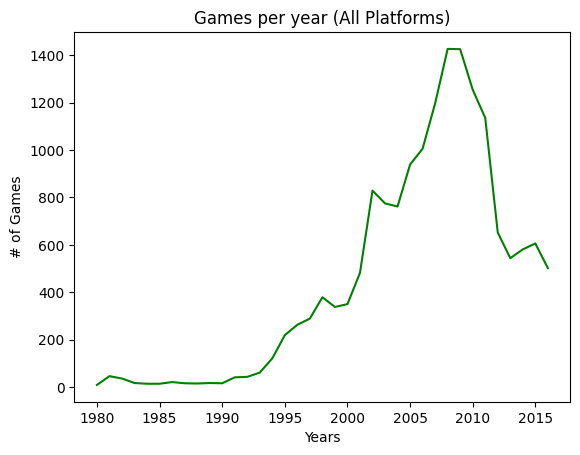

In [156]:
df_games_per_year.plot(kind='line', title='Games per year (All Platforms)', xlabel='Years', ylabel='# of Games', color='green')

plt.show()

Durante el periodo de 2005-2010 existió más competitividad entre las empresas desarrolladoras de juegos, además que comenzaba el reinado de Nintendo con la consola Wii. A su vez, durante 2005 y 2006 se lanzaron las legendarias consolas de PS3 y Xbox 360, las cuales perduraron bastante aún teniendo a sus sucesores en años posteriores.

Consideraremos que los primeros años de los videojuegos (1980 a 1995) como no útiles para este analisis, ya que se mantienen en niveles muy bajos de producción.

In [157]:
df_games_new = df_games[df_games['year_of_release'] > 1995] # Tomamos los años posteriores a 1995

- Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

In [158]:
df_platform_sales = df_games_new.pivot_table(
    index='platform',
    columns='year_of_release',
    values='total_sales',
    aggfunc='sum',
) # Creamos una tabla dinámica para visualizar los datos de ventas por año

df_platform_sales['sum'] = df_platform_sales.sum(axis=1) # Creamos una columna nueva donde hacemos la sumatoria total de ventas a lo largo de los años

df_platform_sales = df_platform_sales.sort_values(by='sum', ascending=False) # Ordenamos de mayor a menor las plataformas y sus ventas

df_platform_sales_top = df_platform_sales[df_platform_sales['sum'] > 680] # Tomamos las consolas con ventas mayores a 680 millones de dólares, ya que la separación con la siguiente plataforma, es de 300 millones

df_platform_sales_top

year_of_release,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,sum
platform,,,,,,,,,,,,,,,,,,,,,
PS2,NaN,NaN,NaN,NaN,39.17,166.43,205.38,184.31,211.81,160.66,...,53.90,26.40,5.64,0.45,NaN,NaN,NaN,NaN,NaN,1233.56
X360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.25,...,135.26,120.29,170.03,143.84,99.74,88.58,34.74,11.96,1.52,961.24
PS3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,118.52,130.93,142.17,156.78,107.35,113.25,47.76,16.82,3.60,931.33
Wii,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,171.32,206.97,127.95,59.65,21.71,8.59,3.75,1.14,0.18,891.18
DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.27,130.14,...,145.31,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN,802.76
PS,94.7,136.17,169.49,144.53,96.37,35.59,6.67,2.07,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,685.59


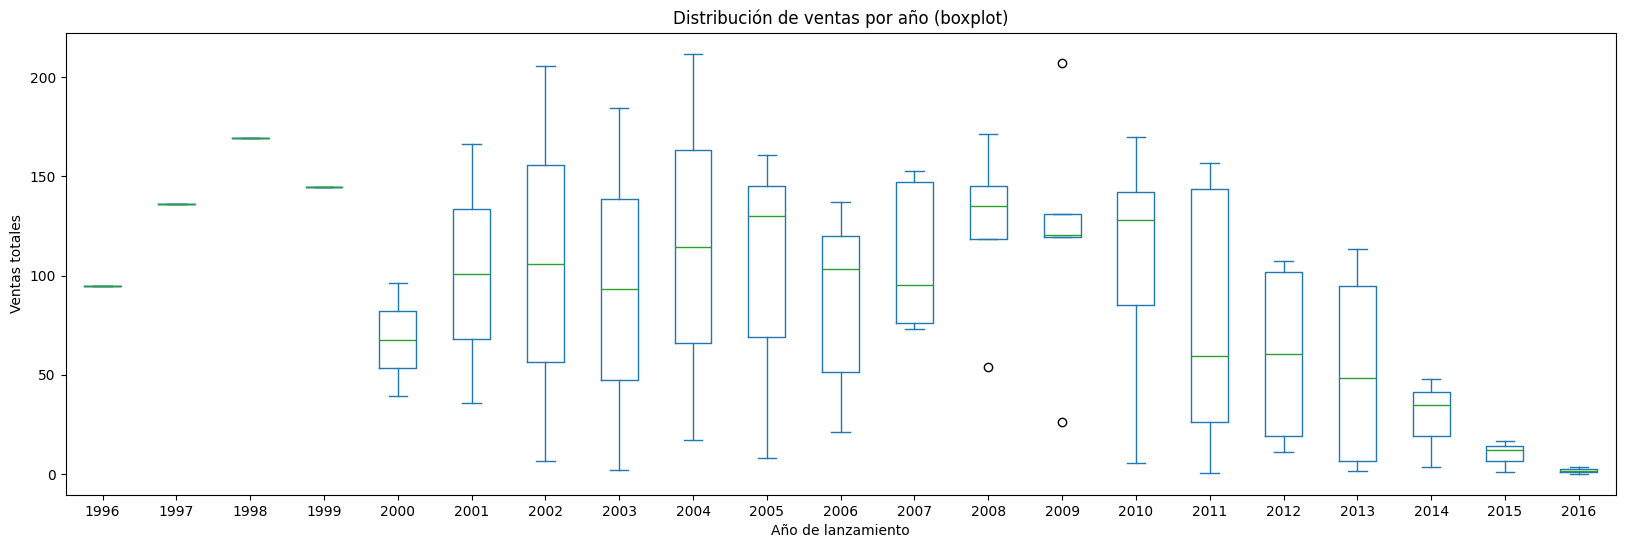

In [159]:
# Distribución de las plataformas de mayor venta

df_platform_sales_top.drop(columns='sum').plot(kind='box', figsize=(20,6))

plt.title("Distribución de ventas por año (boxplot)")
plt.ylabel("Ventas totales")
plt.xlabel("Año de lanzamiento")
plt.show()

En este boxplot confirmamos una vez más la popularidad de las consolas en el periodo de los 2000s, se mantienen las medianas de las ventas cercanas a los 100 millones. Contamos con un descenso de ventas a partir del año 2010 en adelante. Posiblemente es por la popularidad de las PC, que poco a poco se van incluyendo al mercado en los años más recientes.

In [160]:
df_platform_sales['years_active'] = df_platform_sales.iloc[:,:-1].count(axis=1) # Contamos la cantidad de apariciones de valores en cada plataforma, es decir, años donde sí hubo ventas

df_platform_sales = df_platform_sales.sort_values(by='years_active', ascending=False)

In [161]:
df_platform_sales_notactive = df_platform_sales[df_platform_sales[2016].isna()] # Extraemos las consolas que en el año 2016 (último de nuestro dataframe), ya no están generando ventas

notactive_median = df_platform_sales_notactive['years_active'].median() # Extraemos la mediana
notactive_mean = df_platform_sales_notactive['years_active'].mean() # Extraemos la media

df_platform_sales_notactive

year_of_release,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2009,2010,2011,2012,2013,2014,2015,2016,sum,years_active
platform,,,,,,,,,,,,,,,,,,,,,
PS2,NaN,NaN,NaN,NaN,39.17,166.43,205.38,184.31,211.81,160.66,...,26.40,5.64,0.45,NaN,NaN,NaN,NaN,NaN,1233.56,12
PSP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.06,43.84,...,37.78,35.04,17.82,7.69,3.14,0.24,0.12,NaN,289.53,12
DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.27,130.14,...,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN,802.76,10
XB,NaN,NaN,NaN,NaN,0.99,22.26,48.01,55.04,65.42,49.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,251.57,9
PS,94.70,136.17,169.49,144.53,96.37,35.59,6.67,2.07,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,685.59,8
GBA,NaN,NaN,NaN,NaN,0.07,61.53,74.16,56.67,77.91,33.86,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,312.88,8
DC,NaN,NaN,3.38,5.16,5.99,1.07,0.29,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.95,7
GC,NaN,NaN,NaN,NaN,NaN,26.34,51.81,50.61,28.82,27.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,196.73,7
N64,34.10,39.50,49.24,57.87,33.97,3.25,0.08,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218.01,7


In [162]:
notactive_mean

np.float64(6.6)

In [163]:
notactive_median

np.float64(7.0)

Aquí podemos observar que las consolas que son populares en cierto punto de la historia, tienen una tendencia de durar alrededor de 6 o 7 años siendo generadoras de ventas, aunque al visualizar los datos en la tabla, podemos ver que es variado. Nos podríamos basar en la media para dar un punto de vista sobre el tiempo de popularidad de una consola.

- Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.
- Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.


Para este análisis, conservaremos únicamente los años del 2003 en adelante, ya que contempla los años de mayor popularidad de las consolas, a la par que comienza a reflejar el declive de los años más recientes.

In [164]:
df_games2 = df_games[df_games['year_of_release'] > 2002] # Valores del 2003 en adelante

- ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

In [165]:
df_games2_relevant_sales = df_games2.pivot_table( # Creamos nuevamente una tabla dinámica con los años que nos interesan, para conocer las ventas en la historia de cada plataforma
    index='platform',
    columns='year_of_release',
    values='total_sales',
    aggfunc='sum',
)

df_games2_relevant_sales['sales'] = df_games2_relevant_sales.sum(axis=1) # Creamos una sumatoria de todos los años

df_games2_relevant_sales = df_games2_relevant_sales.sort_values(by='sales',ascending=False) # Ordenamos para tener una referencia visual de los datos

df_games2_relevant_sales

year_of_release,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,sales
platform,,,,,,,,,,,,,,,
X360,NaN,NaN,8.25,51.62,95.41,135.26,120.29,170.03,143.84,99.74,88.58,34.74,11.96,1.52,961.24
PS3,NaN,NaN,NaN,20.96,73.19,118.52,130.93,142.17,156.78,107.35,113.25,47.76,16.82,3.60,931.33
Wii,NaN,NaN,NaN,137.15,152.77,171.32,206.97,127.95,59.65,21.71,8.59,3.75,1.14,0.18,891.18
PS2,184.31,211.81,160.66,103.42,75.99,53.90,26.40,5.64,0.45,NaN,NaN,NaN,NaN,NaN,822.58
DS,NaN,17.27,130.14,119.81,146.94,145.31,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN,802.76
PS4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.99,100.00,118.90,69.25,314.14
PSP,NaN,7.06,43.84,55.32,46.93,34.55,37.78,35.04,17.82,7.69,3.14,0.24,0.12,NaN,289.53
3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.20,51.36,56.57,43.76,27.78,15.14,257.81
PC,8.84,10.39,4.37,2.85,9.28,12.42,16.91,24.28,35.03,23.22,12.38,13.28,8.52,5.25,187.02


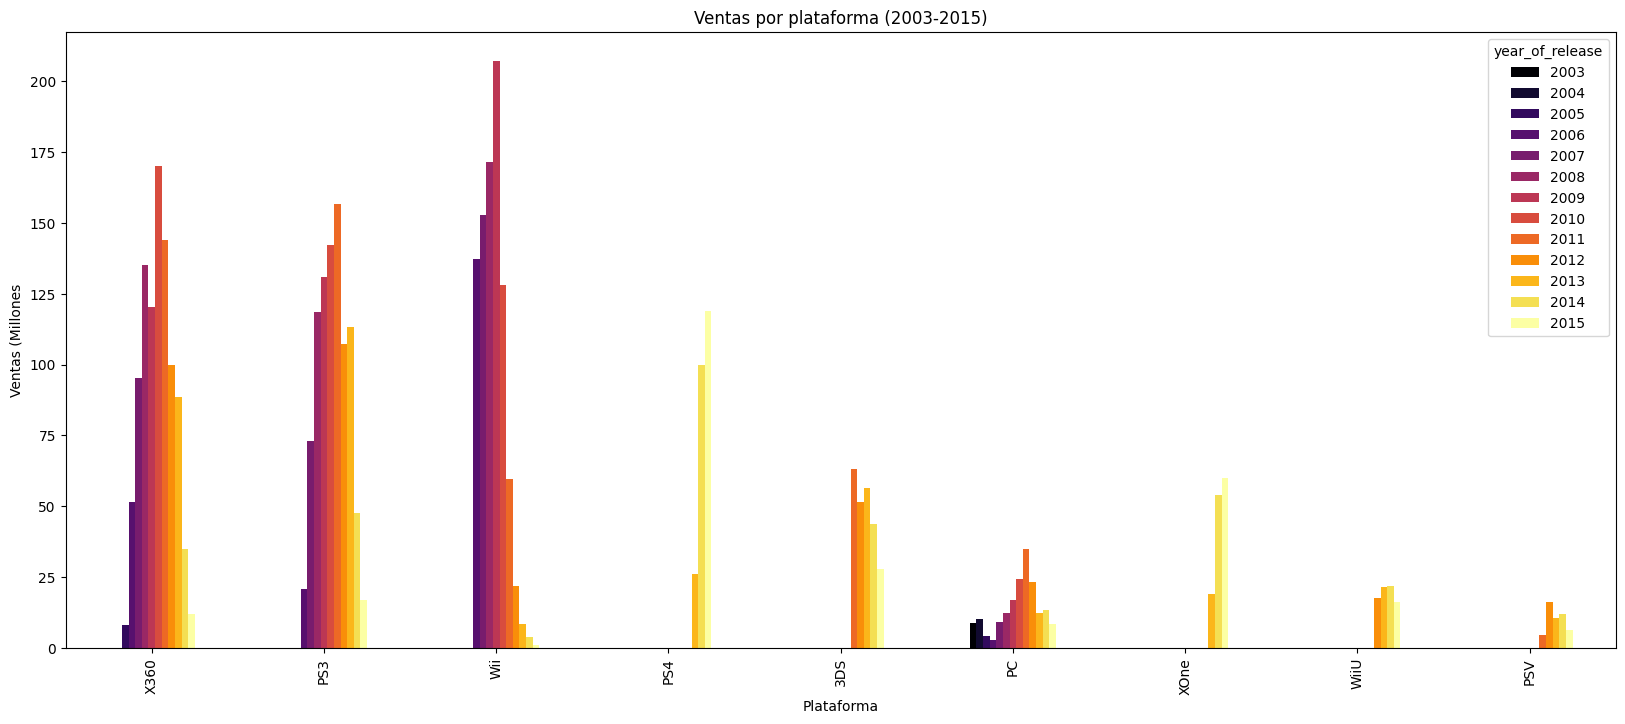

In [166]:
df_games2_relevant_sales_active = df_games2_relevant_sales[~df_games2_relevant_sales[2016].isna()] # Extraemos los valores que siguen activos en ventas durante el 2016

df_games2_relevant_sales_active = df_games2_relevant_sales_active.drop(columns=['sales', 2016]) # Retiramos la columna de sales y del 2016, ya que parece que estos datos fueron recolectados en algún punto de 2016, y nos sesga un poco al momento de ver proyecciones en aumento o descenso

df_games2_relevant_sales_active.plot(kind='bar', figsize=[20,8], title='Ventas por plataforma (2003-2015)', xlabel='Plataforma', ylabel='Ventas (Millones', colormap='inferno')

plt.show()

In [167]:
df_games2_relevant_sales_active

year_of_release,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
platform,,,,,,,,,,,,,
X360,NaN,NaN,8.25,51.62,95.41,135.26,120.29,170.03,143.84,99.74,88.58,34.74,11.96
PS3,NaN,NaN,NaN,20.96,73.19,118.52,130.93,142.17,156.78,107.35,113.25,47.76,16.82
Wii,NaN,NaN,NaN,137.15,152.77,171.32,206.97,127.95,59.65,21.71,8.59,3.75,1.14
PS4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.99,100.00,118.90
3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.20,51.36,56.57,43.76,27.78
PC,8.84,10.39,4.37,2.85,9.28,12.42,16.91,24.28,35.03,23.22,12.38,13.28,8.52
XOne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.96,54.07,60.14
WiiU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.56,21.65,22.03,16.35
PSV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.63,16.19,10.59,11.90,6.25


Con estas visualizaciones, podríamos decir que las plataformas que se ven prometedoras aquí son el PS4, el XOne y posiblemente agregaría la PC ya que esta plataforma es la que más ha perdurado a lo largo del tiempo. Referente al PS4 y XOne, claramente podemos ver que en los años de 2013 en adelante, ha ido en crecimiento las ventas que generan. 

- Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas?

In [168]:
df_games2_salesbox = df_games2.groupby(by=['platform'])['total_sales'].sum().sort_values(ascending=False)

df_games2_salesbox

platform
X360    961.24
PS3     931.33
Wii     891.18
PS2     822.58
DS      802.76
PS4     314.14
PSP     289.53
3DS     257.81
PC      187.02
XB      180.31
GBA     177.12
XOne    159.32
GC      118.58
WiiU     82.19
PSV      53.81
PS        2.07
DC        0.06
Name: total_sales, dtype: float64

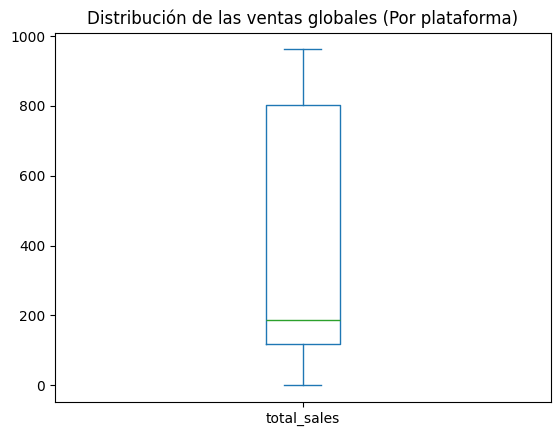

In [169]:
df_games2_salesbox.plot(kind='box', title='Distribución de las ventas globales (Por plataforma)')

plt.show()

Considero que son significativas las diferencias en ventas, ya que la mediana de los datos está por 180 millones, y tenemos casos que llegan incluso hasta más de 900 millones de ventas. Existe clara preferencia para ciertas consolas a lo largo de los años.

- ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

In [170]:
df_games2_meansales = df_games2.groupby(by='platform')['total_sales'].mean().sort_values(ascending=False)

df_games2_meansales

platform
PS4     0.801378
X360    0.780227
PS3     0.713663
Wii     0.692986
PS      0.690000
XOne    0.645020
WiiU    0.559116
PS2     0.520620
3DS     0.503535
DS      0.378660
GBA     0.350733
GC      0.322228
XB      0.295106
PSP     0.242691
PC      0.213493
PSV     0.125431
DC      0.030000
Name: total_sales, dtype: float64

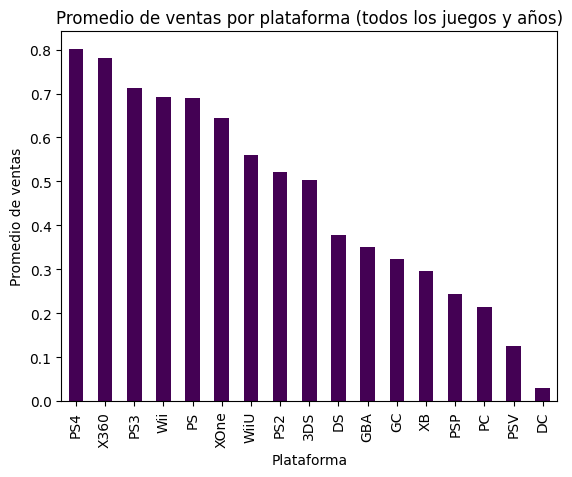

In [171]:
df_games2_meansales.plot(kind='bar', title='Promedio de ventas por plataforma (todos los juegos y años)', xlabel='Plataforma', ylabel='Promedio de ventas', colormap='viridis')

plt.show()

En este caso, podemos observar que el PS4 tiene mejor número de ventas teniendo menor número de títulos. Por ende, además de lo observado anteriormente en que prometía ser una buena consola a la cual apostarle en el 2017; con esto podemos reafirmar aún más esta idea. Por otro lado, el XOne quedó un poco más por detrás a comparación de lo obtenido en ejercicios anteriores.

También es importante destacar que el PS4 al momento de recolectar estos datos, no ha tenido oportunidad de lanzar muchas entregas; tendríamos que cuidar y ver si a lo largo del tiempo, continúa teniendo este desempeño de ventas vs títulos lanzados.

- Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

Consideraremos el PS3 para este ejercicio, por la cantidad de datos históricos que tiene.

In [172]:
df_games2_PS3 = df_games2.query('platform == "PS3"')[['critic_score','user_score','total_sales']]

df_games2_PS3_matrix = df_games2_PS3.corr()

df_games2_PS3_matrix

,critic_score,user_score,total_sales
critic_score,1.000000,0.523203,0.399320
user_score,0.523203,1.000000,0.041586
total_sales,0.399320,0.041586,1.000000


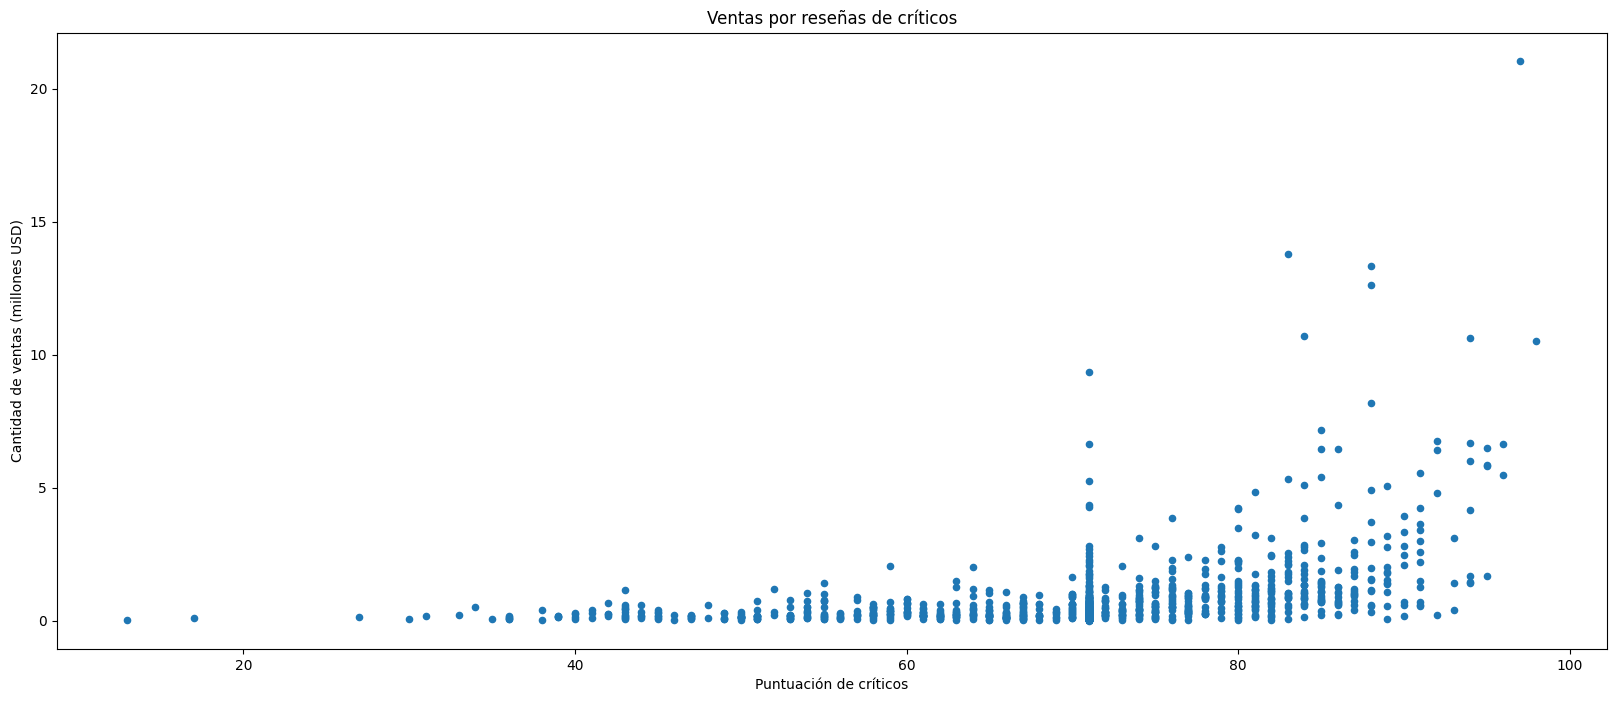

In [173]:
df_games2_PS3.plot(kind='scatter', x='critic_score', y='total_sales', figsize=[20,8], xlabel='Puntuación de críticos', ylabel='Cantidad de ventas (millones USD)', title='Ventas por reseñas de críticos')

plt.show()

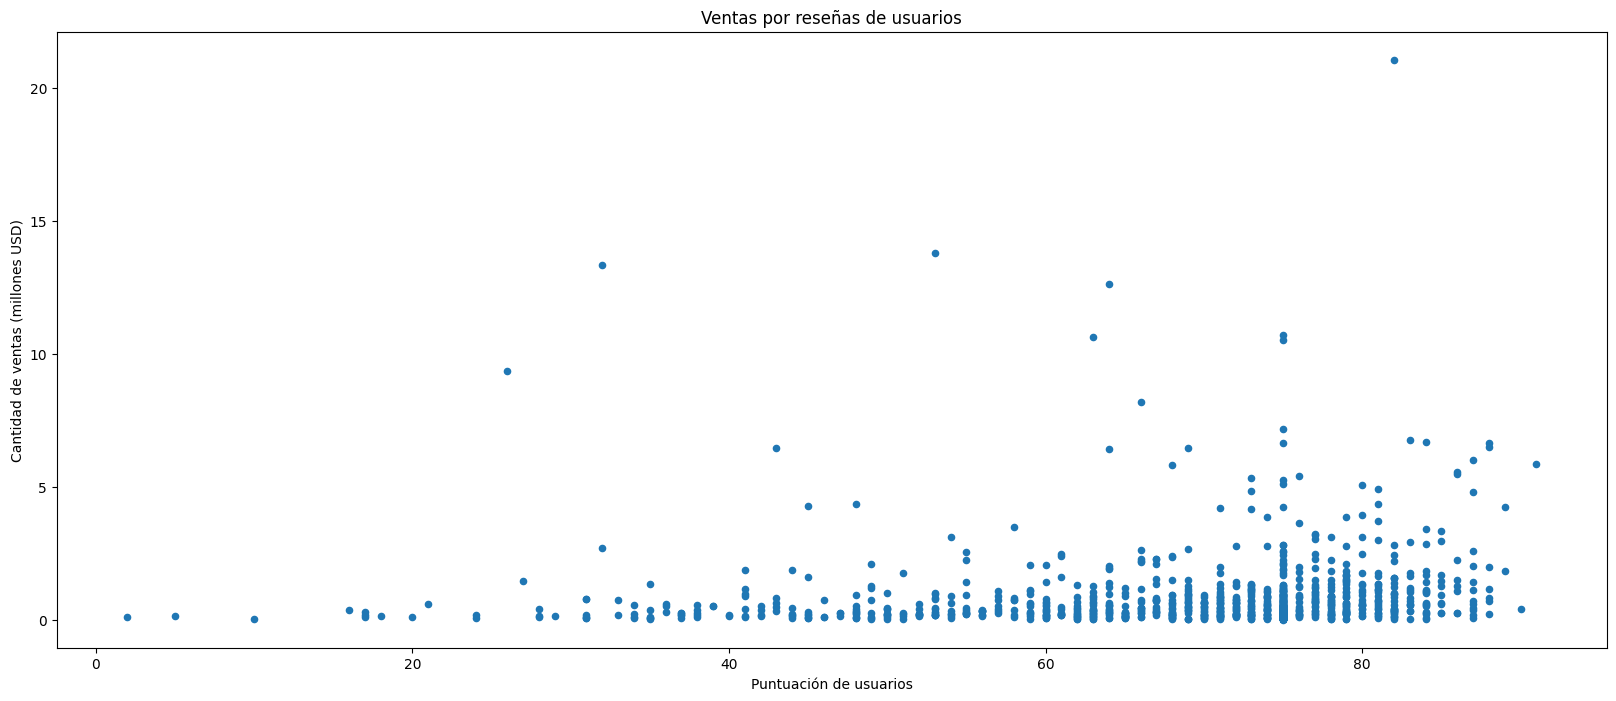

In [174]:
df_games2_PS3.plot(kind='scatter', x='user_score', y='total_sales', figsize=[20,8], xlabel='Puntuación de usuarios', ylabel='Cantidad de ventas (millones USD)', title='Ventas por reseñas de usuarios')

plt.show()

Podemos observar correlaciones positivas en cuanto al número de ventas y a la puntuación dada a los videojuegos, tanto por críticos profesionales como por usuarios. Eso sí, para las puntuaciones de los críticos, es más notoria la presencia de sesgo, ya que mientras mejor califican un videojuego, mejor le va en sus ventas. En el gráfico de dispersión observamos una pequeña curvatura que va en aumento según se avanza en la puntuación de los críticos de videojuegos.

Curiosamente, también la puntuación de usuarios está fuertemente relacionada con la puntuación de los críticos, dando a entender que generalmente cuando un juego le gusta a los usuarios, también a los críticos, y viceversa.

- Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.


In [175]:
duplicated_games = df_games2[df_games2['name'].duplicated()].sort_values(by='name') # Filtramos el dataframe para obtener únicamente los juegos que sus títulos tienen más de una aparición

platform_group_df = duplicated_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False) # Agrupamos por consola y sumamos las ventas totales

platform_group_df

platform
PS3     402.35
X360    391.55
XOne    127.50
Wii     118.09
XB      112.13
DS       97.63
PS2      95.81
PSP      82.25
PC       76.77
GC       59.29
PS4      58.71
GBA      30.09
WiiU     26.44
3DS      22.57
PSV      21.20
Name: total_sales, dtype: float64

Curiosamente, aquí podemos observar que el PS3 encabeza la lista, aunque me hago una idea de esto ya que es de las plataformas con mayor historial de juegos a lo largo de los años, al menos representado en el dataframe original. En seguida tenemos al Xbox 360, y las plataformas que tienen buena expectativa para el año 2017 están divididas, el XOne está bastante arriba en la lista a comparación del PS4. Bien, esto podría ser por lo poco que tienen en el mercado.

- Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

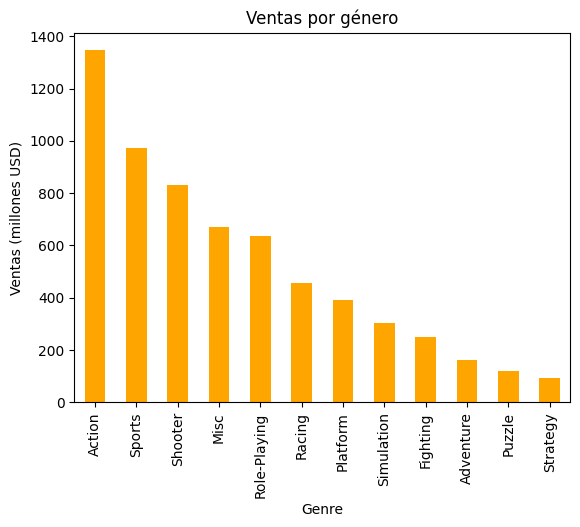

In [176]:
df_genre_sales = df_games2.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

df_genre_sales.plot(kind='bar', title='Ventas por género', xlabel='Genre', ylabel='Ventas (millones USD)', color='orange')

plt.show()

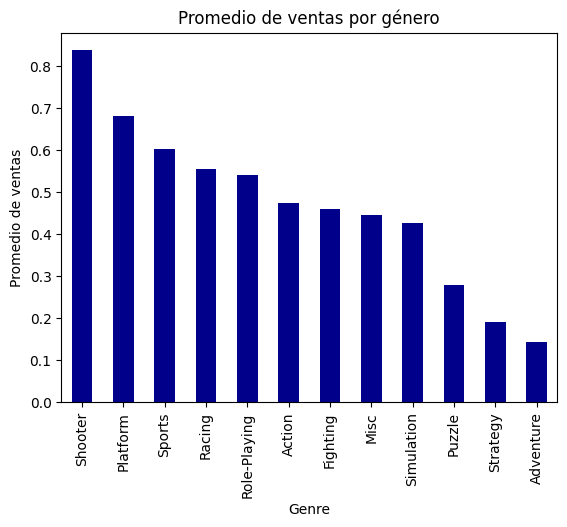

In [177]:
df_genre_mean = df_games2.groupby('genre')['total_sales'].mean().sort_values(ascending=False)

df_genre_mean.plot(kind='bar', title='Promedio de ventas por género', xlabel='Genre', ylabel='Promedio de ventas', color='darkblue')

plt.show()

Parece ser que, a pesar de que los juegos de acción son los más altos en ventas, el juego más rentable de hacer es un shooter, ya que con menos títulos, consiguieron el mayor promedio de ventas. Dependería de qué compañía solicite información para saber si le conviene empujar muchos títulos de género acción, o mejor un buen título de género shooter.

# Perfil de usuario para cada región

Para cada región (NA, UE, JP) determina:

- Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.

In [178]:
df_na_platform = df_games2.groupby('platform')[['na_sales','total_sales']].agg({'na_sales':'sum','total_sales':'mean'}).sort_values(by='na_sales', ascending=False)

df_na_platform

,na_sales,total_sales
platform,,
X360,595.74,0.780227
Wii,486.87,0.692986
PS3,390.13,0.713663
PS2,380.81,0.520620
DS,380.31,0.378660
XB,130.66,0.295106
PS4,108.74,0.801378
PSP,107.27,0.242691
GBA,104.81,0.350733


In [179]:
df_eu_platform = df_games2.groupby('platform')[['eu_sales','total_sales']].agg({'eu_sales':'sum','total_sales':'mean'}).sort_values(by='eu_sales', ascending=False)

df_eu_platform


,eu_sales,total_sales
platform,,
PS3,327.20,0.713663
X360,268.32,0.780227
Wii,258.32,0.692986
PS2,204.35,0.520620
DS,188.41,0.378660
PS4,141.09,0.801378
PC,115.47,0.213493
PSP,65.62,0.242691
3DS,61.27,0.503535


In [180]:
df_jp_platform = df_games2.groupby('platform')[['jp_sales','total_sales']].agg({'jp_sales':'sum','total_sales':'mean'}).sort_values(by='jp_sales', ascending=False)

df_jp_platform

,jp_sales,total_sales
platform,,
DS,175.00,0.378660
3DS,100.62,0.503535
PS2,89.03,0.520620
PS3,79.41,0.713663
PSP,75.88,0.242691
Wii,68.28,0.692986
GBA,26.89,0.350733
PSV,21.84,0.125431
PS4,15.96,0.801378


Tanto en EU como en NA podemos observar que las consolas que reinan son el PS3, Wii y Xbox 360; que es de esperar por toda la propaganda que se tiene del lado occidental del mundo. Por otro lado, para las ventas en Japón se nota la inclinación hacia Nintendo ya que encabezan la lista estas plataformas.

Podemos observar que la cantidad (que está en millones de dólares) se ve reducida en la región de Japón, ya que de entrada, los videojuegos son más baratos en esa zona, además de que la producción de los videojuegos normalmente se concentra más en ese territorio.

- Los cinco géneros principales. Explica la diferencia.

In [181]:
df_na_genre = df_games2.groupby('genre')[['na_sales','total_sales']].agg({'na_sales':'sum','total_sales':'mean'}).sort_values(by='na_sales', ascending=False)
df_eu_genre = df_games2.groupby('genre')[['eu_sales','total_sales']].agg({'eu_sales':'sum','total_sales':'mean'}).sort_values(by='eu_sales', ascending=False)
df_jp_genre = df_games2.groupby('genre')[['jp_sales','total_sales']].agg({'jp_sales':'sum','total_sales':'mean'}).sort_values(by='jp_sales', ascending=False)

df_na_genre

,na_sales,total_sales
genre,,
Action,656.86,0.473496
Sports,502.67,0.603162
Shooter,447.43,0.837616
Misc,339.68,0.445405
Role-Playing,247.21,0.540443
Racing,213.42,0.556333
Platform,201.34,0.682448
Simulation,144.75,0.427309
Fighting,127.89,0.461262


In [182]:
df_eu_genre

,eu_sales,total_sales
genre,,
Action,409.48,0.473496
Sports,296.42,0.603162
Shooter,269.37,0.837616
Misc,183.99,0.445405
Racing,158.74,0.556333
Role-Playing,137.95,0.540443
Platform,111.44,0.682448
Simulation,96.05,0.427309
Fighting,56.99,0.461262


In [183]:
df_jp_genre

,jp_sales,total_sales
genre,,
Role-Playing,202.72,0.540443
Action,117.40,0.473496
Misc,78.50,0.445405
Sports,60.93,0.603162
Platform,44.65,0.682448
Fighting,35.97,0.461262
Simulation,34.37,0.427309
Adventure,31.93,0.143991
Racing,22.39,0.556333


Encontramos que las regiones de NA y EU son muy similares, 4 de sus 5 géneros más populares son iguales, y únicamente se desvían entre juegos de carreras y juegos de rol. Por otro lado, encontramos que en Japón la lista la encabeza los juegos de rol.

Curiosamente, en todas las regiones encontramos a los géneros varios (misc) dentro del top 5, como dando a entender que quizá hay muchos juegos que no se saben reconocer con un género en específico, y la tendencia es a clasificarlos ahí. Además, los géneros de acción y deportes se hacen presentes en todos los top de cada región.

Para mi sorpresa, en japón el género shooter no es tan popular, quizá teniendo que ver con los datos históricos de las regiones de NA y EU, a comparación de la historia detrás de Japón y las guerras.

- Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [184]:
df_games2.groupby('rating')[['na_sales','eu_sales','jp_sales']].agg({'na_sales':'sum','eu_sales':'sum','jp_sales':'sum'}).sort_values(by='na_sales', ascending=False)

,na_sales,eu_sales,jp_sales
rating,,,
Everyone,1044.93,587.50,166.18
Mature,669.38,438.86,50.88
Teens,590.91,325.01,107.15
Everyone +10 y/o,345.50,183.33,40.20
Early Childhood,1.53,0.11,0.00
Adults Only,1.26,0.61,0.00
Rating Pending,0.00,0.03,0.00


Observamos que en todas las regiones lideran los juegos de clasificación Everyone, eso es indiscutible. No obstante, la diferencia entre Mature y Everyone (segundo y primer lugar) es mucho mayor para la región de NA, dando a entender que quizá hay muchos jugadores en general dentro de la región de NA. 

Encontramos que en todas las regiones, en el aspecto individual, el ranking se mantiene a excepción de japón, donde el rating de 'teens' es más popular que el rating mature. Quizá es porque en Japón es poco usual encontrar adultos con tiempo para jugar y hay más jóvenes que se dedican a jugar.

# Hipótesis

Prueba las siguientes hipótesis:

— Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

- Hipótesis nula = Las calificaciones promedio de los usuarios para las plataformas XOne y PC son las mismas.
- Hipótesis alternativa = Las calificaciones promedio de los usuarios para las plataformas XOne y PC son diferentes (mayor o menor)

In [185]:
alpha = 0.1 # Estableceré el valor de alpha así porque considero que no tiene tanto peso el tener un margen de error reducido

df_platform_PC = df_games2[df_games2['platform'] == 'PC']['user_score'] # Extraemos un dataframe donde únicamente encontremos los datos de user_score para los juegos de PC
df_platform_XOne = df_games2[df_games2['platform'] == 'XOne']['user_score'] # Extraemos un dataframe donde únicamente encontremos los datos de user_score para los juegos de Xbox One

df_platform_PC = df_platform_PC.dropna() # Quitamos valores nulos para poder realizar la prueba de Levene y comprobar varianzas
df_platform_XOne = df_platform_XOne.dropna() # Quitamos valores nulos para poder realizar la prueba de Levene y comprobar varianzas

In [186]:
# Ejecutamos prueba de Levene para corroborar si las varianzas de ambos dataframes son significativamente distintos

stat1, levene_value1 = st.levene(df_platform_PC, df_platform_XOne)

print("Estadístico de Levene: ", stat1)
print("Valor de p (en Levene): ", levene_value1)

if levene_value1 > 0.05: # Establecemos el valor de alpha en 0.05 aquí porque nos interesa que sea preciso en determinar la igualdad de varianzas
    print("No hay evidencia suficiente para rechazar la igualdad de varianzas.")
else:
    print("Se rechaza la hipótesis de igualdad de varianzas.")

# Consideramos que las varianzas son iguales para ejecutar la prueba t

Estadístico de Levene:  0.03331385578080852
Valor de p (en Levene):  0.8552070054220666
No hay evidencia suficiente para rechazar la igualdad de varianzas.


In [187]:
results1 = st.ttest_ind(df_platform_PC, df_platform_XOne, equal_var=True)

print('Valor p de la prueba t: ', results1.pvalue)

if results1.pvalue < alpha:
    print("Rechazamos la hipótesis nula.")
else:
    print("No podemos rechazar la hipótesis nula.")

Valor p de la prueba t:  0.00212087339576226
Rechazamos la hipótesis nula.


- Con la prueba realizada, estaríamos descartando la hipótesis nula planteada; es decir, estamos diciendo que contamos con evidencia suficiente como para determinar que las calificaciones promedio de los usuarios no son iguales entre las plataformas de PC y de Xbox One.
- El valor de alpha fue determinado únicamente por haber tomado en cuenta que la prueba no necesita ser tan crítica en cuanto a sus resultados, se dio la oportunidad de probar otro valor de alpha para este ejercicio. Realmente no habría afectado que fuera 0.1 o 0.05 por el valor de p obtenido.
- Las hipótesis fueron formuladas de la manera estándar, es decir, la hipótesis nula consiste de una igualdad mientras que la hipótesis alternativa únicamente sirve como contraria a la hipótesis nula.

— Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

- Hipótesis nula = Las calificaciones promedio de los usuarios para los géneros de acción y deportes son iguales.
- Hipótesis alternativa = Las calificaciones promedio de los usuarios para los géneros de acción y deportes son diferentes (mayor o menor).

In [188]:
df_action = df_games2[df_games2['genre'] == 'Action']['user_score'] # Tomamos un dataframe con solo juegos de acción
df_sports = df_games2[df_games2['genre'] == 'Sports']['user_score'] # Tomamos un dataframe con solo juegos de deporte

df_action = df_action.dropna() # Quitamos valores nulos para aplicar Levene
df_sports = df_sports.dropna() # Quitamos valores nulos para aplicar Levene

# Ejecutamos prueba de Levene para corroborar si las varianzas de ambos dataframes son significativamente distintos

stat2, levene_value2 = st.levene(df_action, df_sports)

print("Estadístico de Levene: ", stat2)
print("Valor de p (en Levene): ", levene_value2)

if levene_value2 > 0.05: # Establecemos el valor de alpha en 0.05 aquí porque nos interesa que sea preciso en determinar la igualdad de varianzas
    print("No hay evidencia suficiente para rechazar la igualdad de varianzas.")
else:
    print("Se rechaza la hipótesis de igualdad de varianzas.")

# Consideramos que las varianzas son significativamente diferentes para ejecutar la prueba t

Estadístico de Levene:  12.120872300719695
Valor de p (en Levene):  0.0005033938159957107
Se rechaza la hipótesis de igualdad de varianzas.


In [189]:
results2 = st.ttest_ind(df_action, df_sports, equal_var=False)

print('Valor p de la prueba t: ', results2.pvalue)

if results2.pvalue < alpha:
    print("Rechazamos la hipótesis nula.")
else:
    print("No podemos rechazar la hipótesis nula.")

Valor p de la prueba t:  0.005212423209922029
Rechazamos la hipótesis nula.


- Con la prueba realizada, estaríamos descartando la hipótesis nula planteada; es decir, estamos diciendo que contamos con evidencia suficiente como para determinar que las calificaciones promedio de los usuarios no son iguales entre los géneros de acción y de deportes.
- El valor de alpha fue determinado únicamente por haber tomado en cuenta que la prueba no necesita ser tan crítica en cuanto a sus resultados, se dio la oportunidad de probar otro valor de alpha para este ejercicio. Realmente no habría afectado que fuera 0.1 o 0.05 por el valor de p obtenido.
- Las hipótesis fueron formuladas de la manera estándar, es decir, la hipótesis nula consiste de una igualdad mientras que la hipótesis alternativa únicamente sirve como contraria a la hipótesis nula.

# Conclusiones generales

- Las ventas de videojuegos en general van en declive, es posible que sea porque la industria está comenzando a encontrar un punto medio entre la cantidad de lanzamientos y la calidad de los mismos. Hace unos años, estaba el furor de crear nuevos juegos por la poca diversidad que existía de estos, además que se sentía un aire de innovación con las tecnologías inalámbricas para controlar las distintas plataformas (ejemplo claro, el Wii de Nintendo)
- Las ventas de videojuegos a su vez, tenían mucho sesgo hacia ciertas plataformas durante los años 2002-2005, existían algunas muy populares (PS3, Xbox 360, Wii) mientras que otras se quedaban poco a poco en el olvido.
- Para los años siguientes, del 2017 en adelante, observamos una ligera tendencia a crecer por parte de las plataformas de PS4 y XOne, además de la persistencia del PC a lo largo de los años, ya que siempre genera ventas.
- Podemos observar una clara influencia en las ventas de los videojuegos según las reseñas de los críticos. Las reseñas de los usuarios quedan un poco en segundo plano aunque sí tienen un cierto efecto en las ventas totales.
- Los juegos que más probabilidades tienen de vender son los shooter, los de acción y de deportes, sobre todo en las regiones de NA y EU.
- En general podemos decir que la clasificación ESRB no afectan a las regiones en cuanto a ventas, todas mantienen el ranking similar, siendo encabezadas por “Everyone”
- Las calificaciones promedio de los usuarios son diferentes entre las plataformas de PC y Xbox One
- Las calificaciones promedio de los usuarios son diferentes entre los géneros de acción y deportes.
